# Predicting Stock Prices with Machine Learning

In [29]:
import quandl
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

### Gathering our Financial Data using Quandl API

In [30]:
quandl.ApiConfig.api_key= 'Lzsy-HoXDFs9XrEU6b7-'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


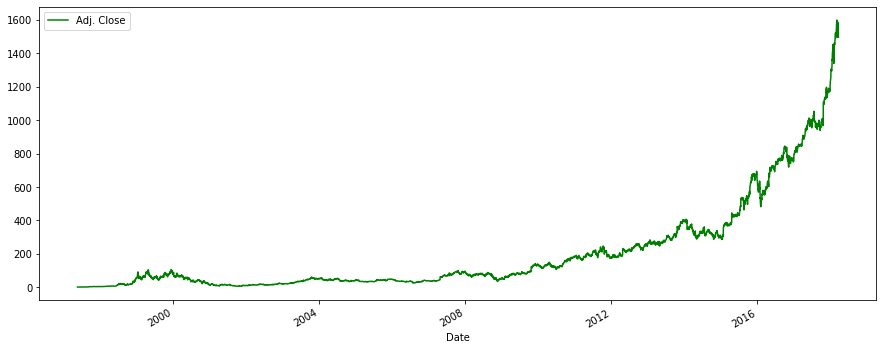

In [31]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

### Processing Train and Test Data 

In [32]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

Y = np.array(df['Prediction'])
Y = Y[:-forecast]

### Applying Linear Regression

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, Y_train)

confidence = clf.score(X_test, Y_test)

forecast_predicted = clf.predict(X_forecast)
#print(forecast_predicted)

[1503.64240831 1542.58071698 1553.99366952 1540.06581801 1561.01620521
 1576.54250946 1578.50327815 1594.74355796 1618.13424967 1607.50986715
 1608.01071567 1587.76364767 1595.00996675 1619.90320403 1634.8540653
 1642.69714006 1650.00739724 1678.81151556 1699.59140114 1688.71126618
 1691.71635732 1682.46664415 1671.12828607 1642.6225456  1686.93165546
 1681.97645198 1641.73806842 1590.01213786 1654.26993788 1591.59993424]


### Final Visualisation of the Predicted Results

(17282.0, 17738.0)

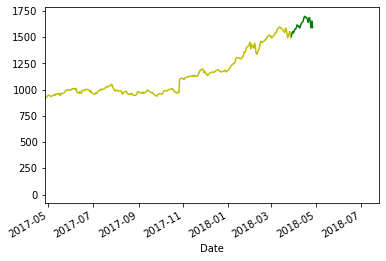

In [38]:
dates = pd.date_range(start = "2018-03-28", end = "2018-04-26")
plt.plot(dates, forecast_predicted, color='g')
df['Adj. Close'].plot(color='y')
plt.xlim(xmin=datetime.date(2017,4,26))
plt.xlim(xmax=datetime.date(2018,7,26))